<a href="https://colab.research.google.com/github/yrodriguezmd/Credit_card/blob/main/Fastai_02_images%2C_aug%2C_train%2C_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastbook import *

In [ ]:
!pip install fastai -U

In [ ]:
import fastai
from fastai.vision.all import *

In [ ]:
from fastai.vision.widgets import *

In [ ]:
pip install bing-image-downloader

In [ ]:
!pip install jmd_imagescraper
from jmd_imagescraper.core import *
from pathlib import Path

In [ ]:
flowers = 'rose', 'lily','sunflower'
path = Path('flowers')

if not path.exists():
  path.mkdir()
  for o in flowers:
    dest = (path/o)
    dest.mkdir()
    results = duckduckgo_search(path/o, o, o, max_results = 150)

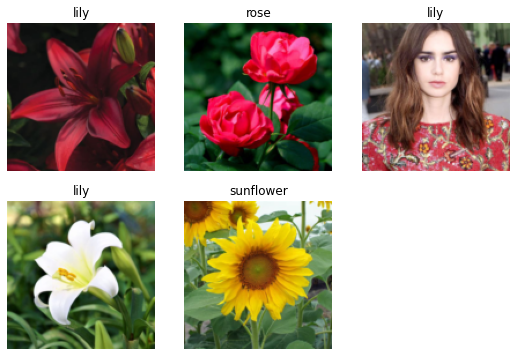

In [ ]:
## no reference to previous code?
flwr = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct= 0.2, seed =42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

dls = flwr.dataloaders(path)

dls.valid.show_batch(max_n = 5, nrows=2)
## no longer working -- maybe duckduckgo is limited

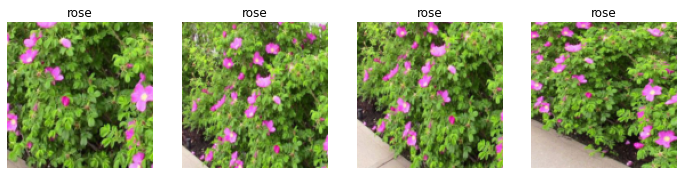

In [ ]:
# resizing
flwr = flwr.new(item_tfms = RandomResizedCrop(128, min_scale = 0.1,
                                        max_scale=2.0))
dls_resize = flwr.dataloaders(path)
dls_resize.train.show_batch(max_n=4, nrows=1, unique=True)

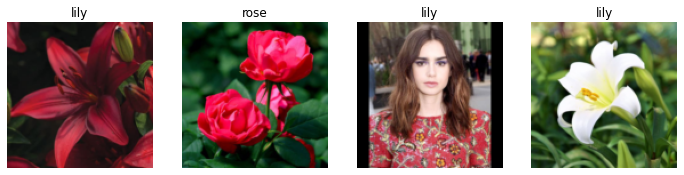

In [ ]:
# resizing
flwr = flwr.new(item_tfms= Resize(128, ResizeMethod.Pad,
                                          pad_mode = 'zeros'))
dls_pad = flwr.dataloaders(path)
dls_pad.valid.show_batch(max_n=4, nrows=1)

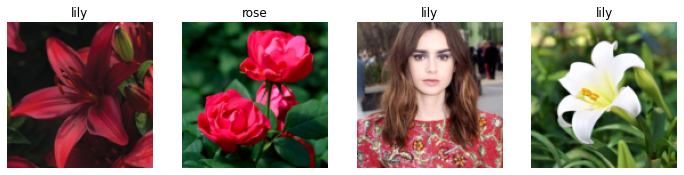

In [ ]:
# augment
flwr = flwr.new(item_tfms= Resize(128, aug_transforms(mult=2)))
dls_aug = flwr.dataloaders(path)
dls_aug.valid.show_batch(max_n=4, nrows=1)

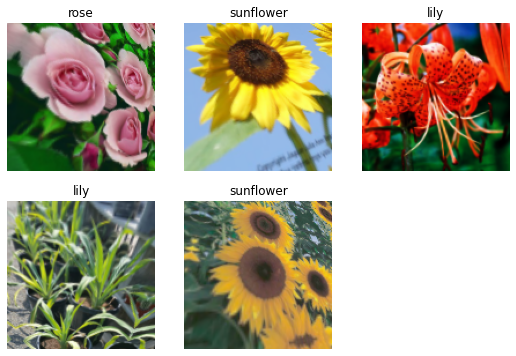

In [ ]:
# new aug trans in the block as batch
# new drop last
flwr = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct= 0.2, seed =42),
    get_y = parent_label,
    item_tfms = Resize(128),
    batch_tfms = aug_transforms(mult=2),
)

dls_fl = flwr.dataloaders(path, drop_last=True)

dls_fl.train.show_batch(max_n = 5, nrows=2)
## no longer working -- maybe duckduckgo is limited

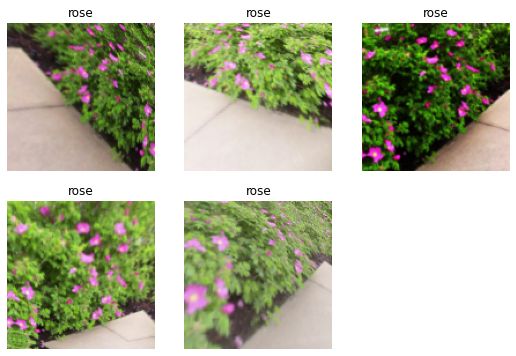

In [ ]:
# new aug trans in the block as batch
# new drop last
flwr = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct= 0.2, seed =42),
    get_y = parent_label,
    item_tfms = Resize(128),
    batch_tfms = aug_transforms(mult=2),
)
dls_fl = flwr.dataloaders(path, drop_last=True)

dls_fl.train.show_batch(max_n = 5, nrows=2, unique=True)
## no longer working -- maybe duckduckgo is limited

In [ ]:
flwr = flwr.new(
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
)
dls = flwr.dataloaders(path, valid = 'validation set')

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

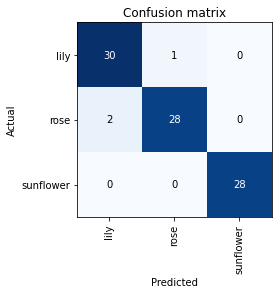

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

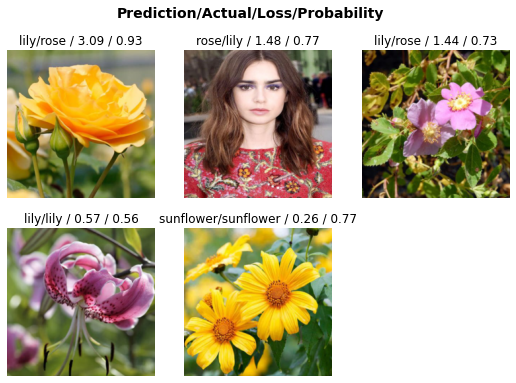

In [ ]:
interp.plot_top_losses(5)

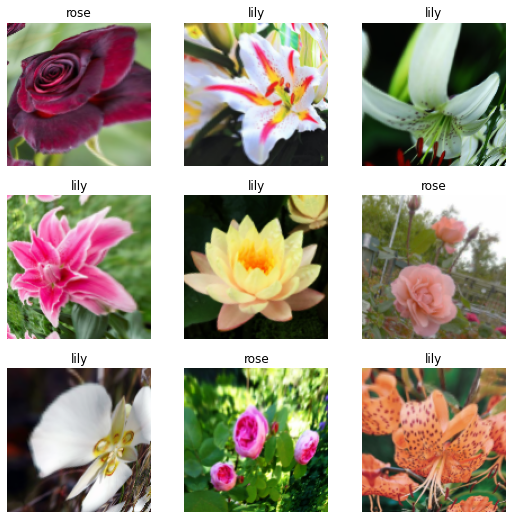

In [ ]:
dls_fl.train.show_batch()

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# remove the selection chosen as delete in above code
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
# move image to another class
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

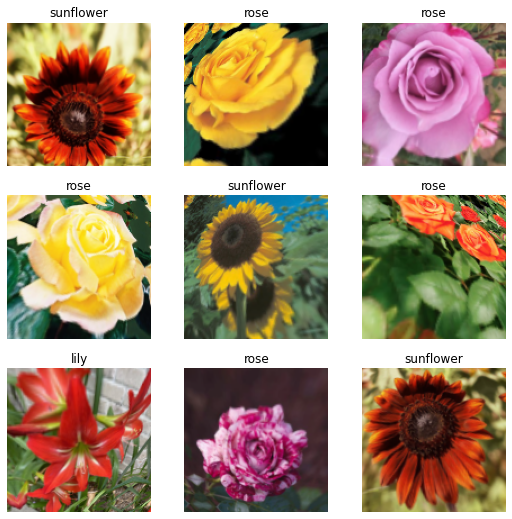

In [ ]:
## find out how to view cleaned collection
dls_fl.train.show_batch()

In [ ]:
## retrain

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

In [ ]:
# saving model
learn.export()

path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [ ]:
# if on a new notebook
learn_inf = load_learner(path/'export.pkl')

In [ ]:
# getting an image for prediction
!pip install bing-image-downloader
from bing_image_downloader import downloader
query_string = 'rose'
rose1 = downloader.download(query_string, limit = 1, 
                            output_dir = 'dataset',
                            adult_filter_off=True,
                            force_replace=False,
                            timeout=60,
                            verbose=True)
rose1

[%] Downloading Images to /content/dataset/rose


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/2e/5b/dd/2e5bddd2381cf058c3b39e37f6a5606d.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.

Please show your support here
https://www.buymeacoffee.com/gurugaurav




In [ ]:
rose1_url = ['https://i.pinimg.com/originals/2e/5b/dd/2e5bddd2381cf058c3b39e37f6a5606d.jpg']
dest = 'Desktop'
download_url(rose1_url[0],dest)

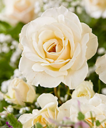

In [ ]:
Image.open(dest).to_thumb(128,128)

In [ ]:
# inference: get predictions one image at a time
learn_inf.predict(dest)

('rose', tensor(1), tensor([3.4453e-04, 9.9912e-01, 5.3351e-04]))

In [ ]:
learn_inf.dls.vocab
# probabilities on above ouput corresponds to these categories
#    based on the order in DataLoaders

['lily', 'rose', 'sunflower']

In [ ]:
# making an app
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

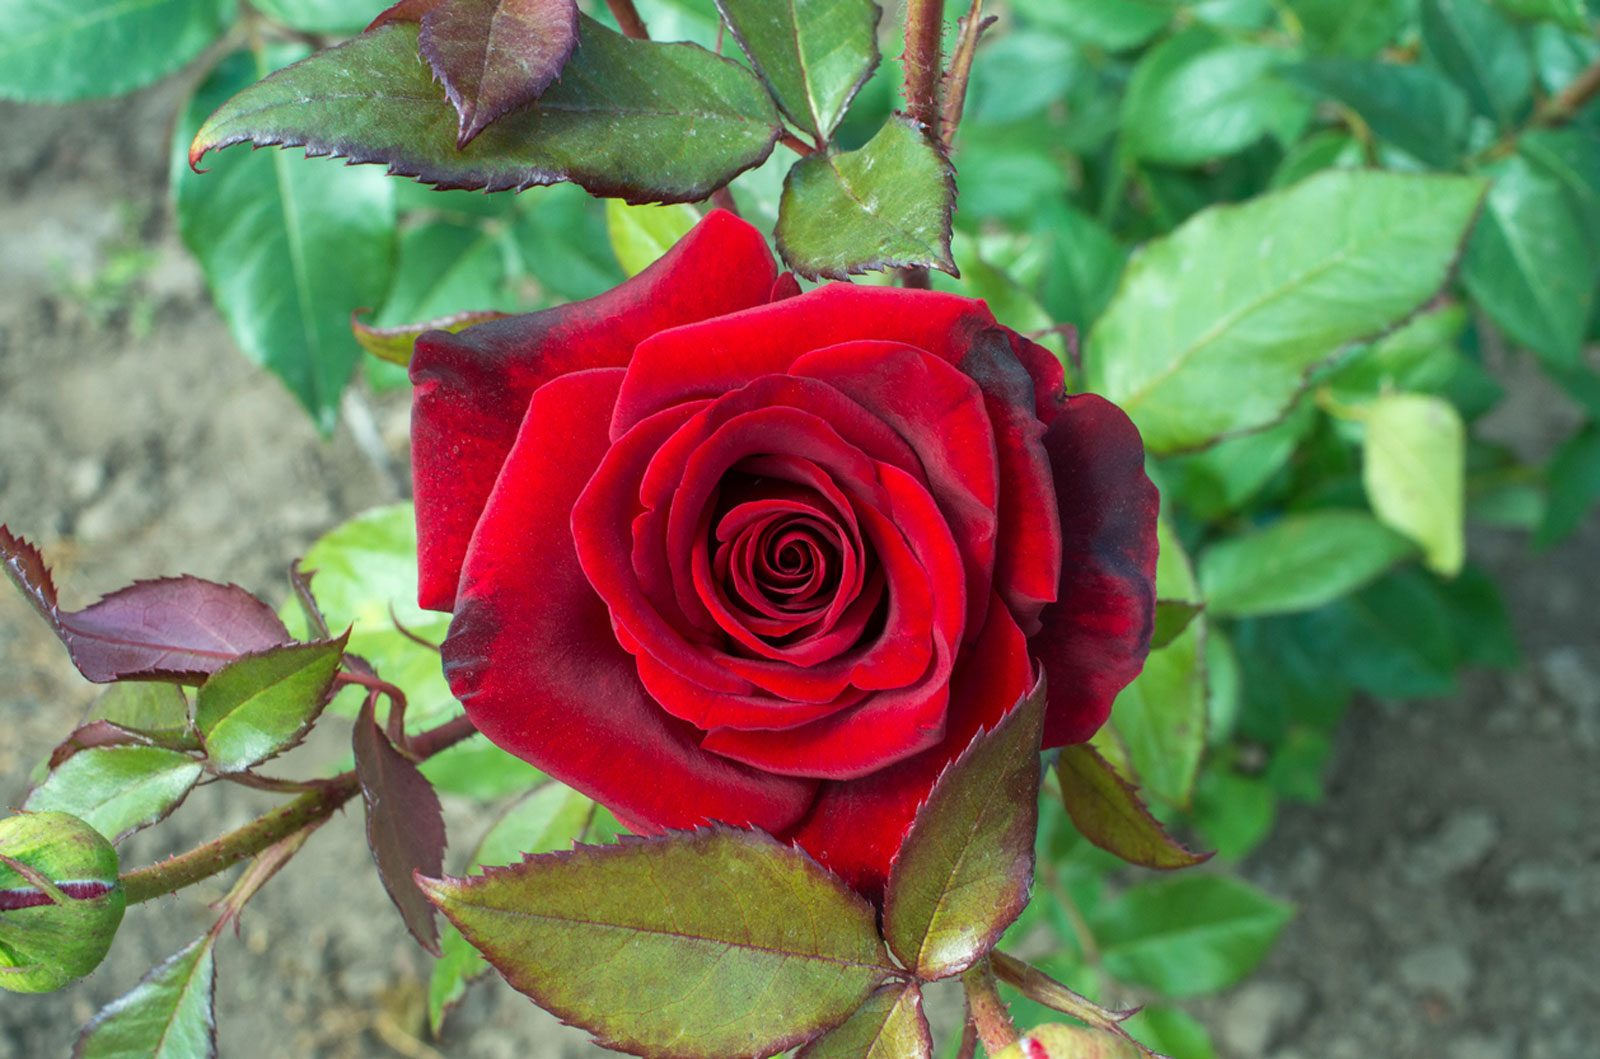

In [ ]:
img

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
# getting predictions
pred, pred_idx, probs = learn_inf.predict(img)

# labelling
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: rose; Probability: 0.9977')

In [ ]:
# button for the classification
btn_run = widgets.Button(description = 'Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
# click event handler
def on_click_classify(change):
  img= PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:0.4f}'

btn_run.on_click(on_click_classify)

In [ ]:
# putting it together
btn_upload = widgets.FileUpload()

VBox([widgets.Label('Select your flower!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
# putting it together
btn_upload = widgets.FileUpload()

VBox([widgets.Label('Select your flower!'),
      btn_upload, btn_run, out_pl, lbl_pred])
# worked on new upload